In [6]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')


# import ML Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
logging.info('importing data set using pandas function')

In [8]:
url="https://raw.githubusercontent.com/MontyVasita18/Crop_Recommendation_Model/refs/heads/main/Crop_Recommendation.csv?token=GHSAT0AAAAAAC7XWSWWLYYROA7WTEOM35XWZ7ND23Q"
df=pd.read_csv(url)

df.sample(frac=1)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2043,77,51,44,23.255834,82.701593,7.124334,166.216085,Jute
885,28,67,21,21.797926,63.730861,6.250994,46.623702,Lentil
264,52,73,79,17.257695,18.749440,7.840339,94.002872,ChickPea
1277,16,130,201,29.120338,82.790929,5.682395,68.850305,Grapes
2031,81,36,38,23.765547,87.983299,6.334838,150.316615,Jute
...,...,...,...,...,...,...,...,...
1490,80,18,51,28.053807,91.817588,6.706053,20.765821,Muskmelon
114,66,54,21,25.190087,60.200169,5.919046,72.123756,Maize
544,32,48,18,26.457078,56.402263,5.993514,64.161677,MothBeans
420,24,63,19,19.347944,55.968055,4.681576,194.592115,PigeonPeas


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [19]:
df.corr().style.background_gradient(cmap='coolwarm')

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
Crop,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


In [34]:
df.Crop.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int64)

In [52]:
from collections import OrderedDict

stats=[]

for i in df.columns:
    if df[i].dtype!='object':
     numerical_stats= OrderedDict({
        'feature':i,
        'unique_values':df[i].nunique(),
        'mode':df[i].mode()[0],
        'mean':df[i].mean(),
        'std_deviation':df[i].std(),
        'min_value':df[i].min(),
        'max_value':df[i].max(),
        'range':df[i].max() - df[i].min(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurtosis(),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats=pd.DataFrame(stats)

df_stats



,feature,unique_values,mode,mean,std_deviation,min_value,max_value,range,skewness,kurtosis,IQR
0,Nitrogen,137,22.000000,50.551818,36.917334,0.000000,140.000000,140.000000,0.509721,-1.058240,63.250000
1,Phosphorus,117,60.000000,53.362727,32.985883,5.000000,145.000000,140.000000,1.010773,0.860279,40.000000
2,Potassium,73,17.000000,48.149091,50.647931,5.000000,205.000000,200.000000,2.375167,4.449354,29.000000
3,Temperature,2200,8.825675,25.616244,5.063749,8.825675,43.675493,34.849818,0.184933,1.232555,5.792279
4,Humidity,2200,14.258040,71.481779,22.263812,14.258040,99.981876,85.723836,-1.091708,0.302134,29.686818
5,pH_Value,2200,3.504752,6.469480,0.773938,3.504752,9.935091,6.430338,0.283929,1.655581,0.951950
6,Rainfall,2200,20.211267,103.463655,54.958389,20.211267,298.560117,278.348850,0.965756,0.607079,59.715822
7,Crop,22,0.000000,10.500000,6.345731,0.000000,21.000000,21.000000,0.000000,-1.204980,11.000000


In [64]:
from sklearn.preprocessing import LabelEncoder

df['Crop']=LabelEncoder().fit_transform(df['Crop'])


In [54]:
X=df.drop(columns='Crop')
y=df['Crop']

y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


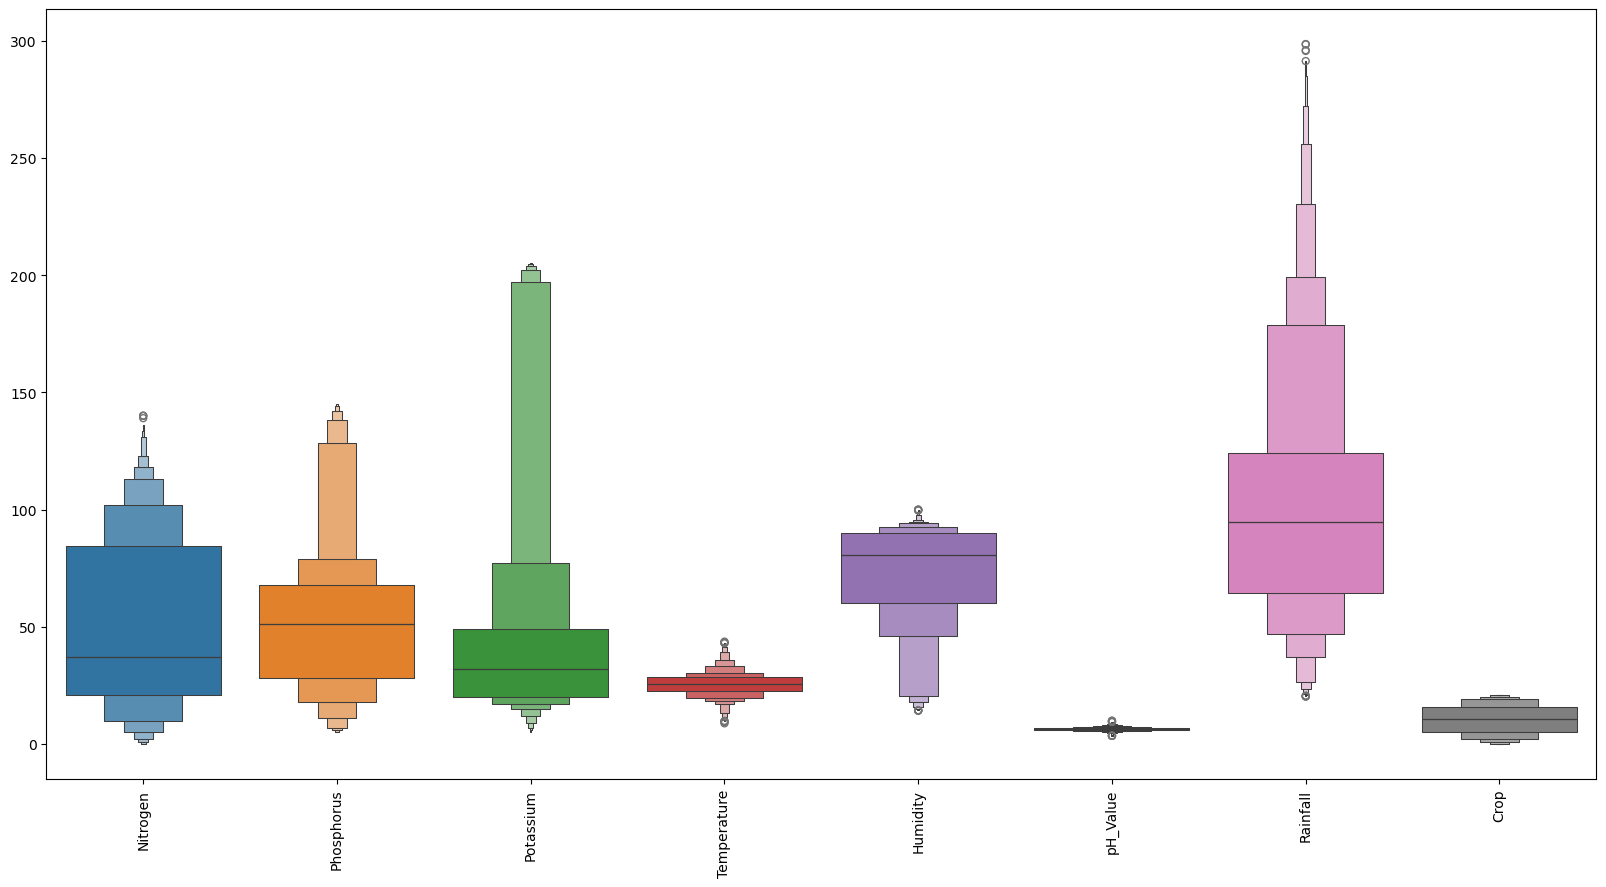

In [56]:
plt.figure(figsize= (20,10))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_RF)



0.990909090909091

In [61]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

y_pred_RFR=RF.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred_RFR)

0.9730213055042498

In [62]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(X_train,y_train)

y_pred_SVC=svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_SVC)   


0.9727272727272728